In [ ]:
import numpy as np
import IPython.display as ipd
import librosa as lbr
import wave
import struct

In [ ]:
def wavread(sndfile):
  wf = wave.open(sndfile,'rb')
  nchan = wf.getnchannels()
  bytes = wf.getsampwidth()
  rate = wf.getframerate()
  length = wf.getnframes()
  print("Number of channels: ",nchan)
  print("Number of bytes per sample:",bytes)
  print("Sampling rate: ", rate)
  print("Number of samples: ", length)
  print("end line")
  data = wf.readframes(length)
  if bytes == 2:
    shorts = (struct.unpack('h' * length, data))
  else:
    shorts = (struct.unpack('B' * length, data))
  wf.close

  return shorts, rate


In [ ]:
!ls

Megadeth.mp3  sample_data


In [ ]:
import sys

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving audio_fspeech.wav to audio_fspeech.wav


Load Audio

In [ ]:
x, fs = wavread('audio_fspeech.wav')

Number of channels:  1
Number of bytes per sample: 2
Sampling rate:  32000
Number of samples:  207612
end line


Clean one

In [ ]:
display(ipd.Audio(x,rate = fs))

add noise

In [ ]:
y = x+0.1*(np.random.random(np.shape(x))-0.5)*2**15
display(ipd.Audio(y, rate = fs))

In [ ]:
x = np.matrix(x).T
y = np.matrix(y).T

In [ ]:
A = np.matrix(np.zeros((100000, 10)))
for m in range(100000):
  A[m,:] = y[m+np.arange(10)].T

print(A.shape)

(100000, 10)


<function matplotlib.pyplot.grid>

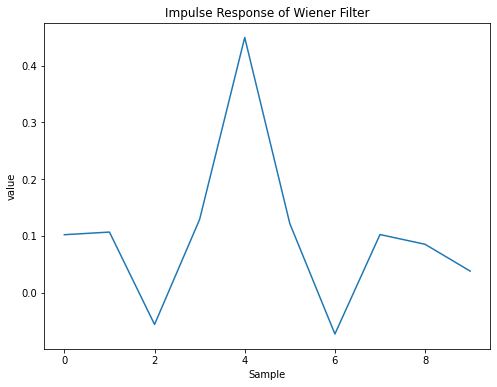

In [ ]:
import matplotlib.pyplot as plt
h = np.linalg.inv(A.T*A)*A.T*x[5:100000+5]
plt.figure(figsize=(8,6))
plt.plot(np.flipud(h))
plt.xlabel('Sample')
plt.ylabel('value')
plt.title('Impulse Response of Wiener Filter')
plt.grid

Frequency Response

In [ ]:
from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator


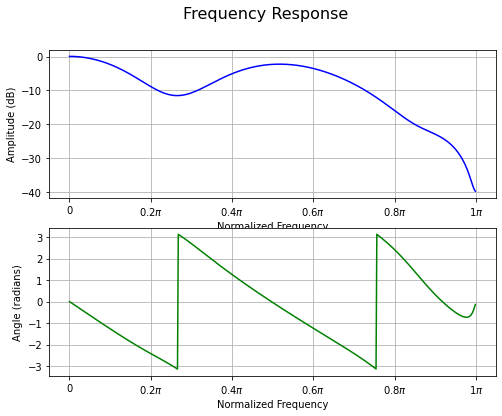

In [ ]:
w, h_response = freqz(np.flipud(h))

fig = plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response',fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')

plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()

In [ ]:
from scipy import signal as sp


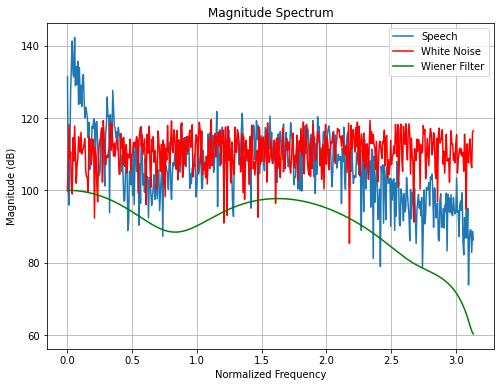

In [ ]:
w,Hspeech=sp.freqz(x);
w,Hnoise=sp.freqz(0.1*(np.random.random(np.shape(x))-0.5)*2**15)
w,Hw=sp.freqz(np.flipud(h))
plt.figure(figsize=(8,6))
plt.plot(w,20*np.log10(abs(Hspeech))); 
plt.plot(w,20*np.log10(abs(Hnoise)),'r');
#plot and shift the filter into the vicinity of the signal:
plt.plot(w,20*np.log10(abs(Hw))+100,'g')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.legend(('Speech', 'White Noise', 'Wiener Filter'))
plt.title('Magnitude Spectrum')
plt.grid()

In [ ]:
xw = sp.lfilter(np.array(np.flipud(h).T)[0],[1],np.array(y.T)[0])


In [ ]:
display(ipd.Audio(xw, rate = fs ))


In [ ]:
x, fs = wavread('audio_fspeech.wav')
y = x+0.1*(np.random.random(np.shape(x))-0.5)*2**15
display(ipd.Audio(y, rate = fs))

Number of channels:  1
Number of bytes per sample: 2
Sampling rate:  32000
Number of samples:  207612
end line


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Megadeth.mp3 to Megadeth (1).mp3


In [ ]:
# Load audio
x , sr =lbr.load('Megadeth.mp3', offset=7, duration=10)
x/=np.abs(x).max()
display(ipd.Audio(x, rate = sr ))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
np.random.seed(27)
megadeth_noise = x + 0.5*(np.random.random(np.shape(x))-0.5)
display(ipd.Audio(megadeth_noise, rate = sr ))

In [ ]:
megadeth_filter = sp.wiener(megadeth_noise,mysize=7)
display(ipd.Audio(megadeth_filter,rate=sr))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coldplay.mp3 to coldplay.mp3


In [ ]:
# Load audio
x , sr =lbr.load('coldplay.mp3', offset=50, duration=10)
x/=np.abs(x).max()
display(ipd.Audio(x, rate = sr ))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
np.random.seed(27)
coldplay_noise = x + 0.5*(np.random.random(np.shape(x))-0.5)
display(ipd.Audio(coldplay_noise, rate = sr ))

In [ ]:
coldplay_filter = sp.wiener(coldplay_noise,mysize=21)
display(ipd.Audio(coldplay_filter,rate=sr))